<a href="https://colab.research.google.com/github/Jackesgamero/TensorFlow-for-Deep-Learning/blob/master/Fashion-MNIST%20Clothing%20Classifier/Fashion_MNIST_Clothing_Classifier_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf

In [58]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [60]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [62]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocesar los datos

In [63]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

## Explorar datos procesados

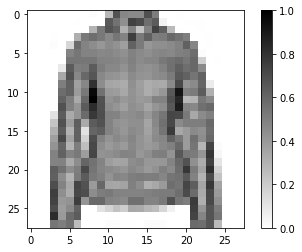

In [64]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

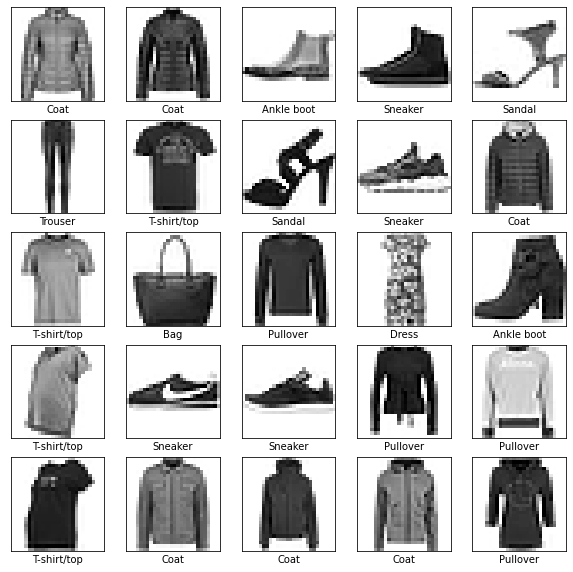

In [65]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Configurar las capas


In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Estas capas de red son:

* **"convoluciones"** `tf.keras.layers.Conv2D and MaxPooling2D`— La red comienza con dos pares de Conv / MaxPool. La primera capa es un filtro Conv2D (3,3) que se aplica a la imagen de entrada, conservando el tamaño de la imagen original mediante el uso de relleno y creando 32 imágenes de salida (convolucionadas) (por lo que esta capa crea 32 imágenes convolucionadas del mismo tamaño que la entrada ). Después de eso, las 32 salidas se reducen en tamaño usando un MaxPooling2D (2,2) con un paso de 2. El siguiente Conv2D también tiene un kernel (3,3), toma las 32 imágenes como entrada y crea 64 salidas que son nuevamente reducido de tamaño por una capa MaxPooling2D.

* **salida** `tf.keras.layers.Dense` — Una capa de 128 neuronas, seguida de una capa softmax de 10 nodos . Cada nodo representa una clase de ropa. Como en la capa anterior, la capa final toma la entrada de los 128 nodos de la capa anterior y genera un valor en el rango`[0, 1]`, que representa la probabilidad de que la imagen pertenezca a esa clase. La suma de los 10 valores de los nodos es 1.

### Compile the model


In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Entrenar el modelo

In [68]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [69]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4018 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2597 - accuracy: 0.9051
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2171 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1817 - accuracy: 0.9324
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1547 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1335 - accuracy: 0.9499
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1117 - accuracy: 0.9584
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0955 - accuracy: 0.9648
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9717
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.066

## Evaluar precision

In [70]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.3176 - accuracy: 0.9219
Accuracy on test dataset: 0.9218999743461609


## Realizar predicciones

In [71]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [72]:
predictions.shape


(32, 10)

In [73]:
predictions[0]

array([2.2811456e-07, 9.9077056e-08, 4.0466775e-04, 3.0129534e-09,
       9.7318733e-01, 1.1532610e-09, 2.6403423e-02, 5.1369281e-10,
       3.3630227e-11, 4.2543852e-06], dtype=float32)

In [74]:
np.argmax(predictions[0])

4

In [75]:
test_labels[0]

4

In [76]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

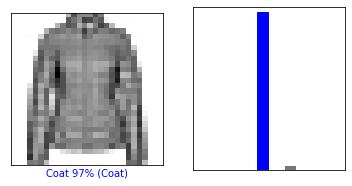

In [77]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

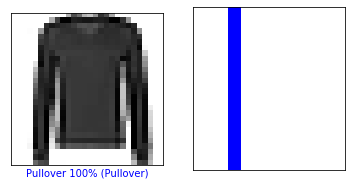

In [78]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

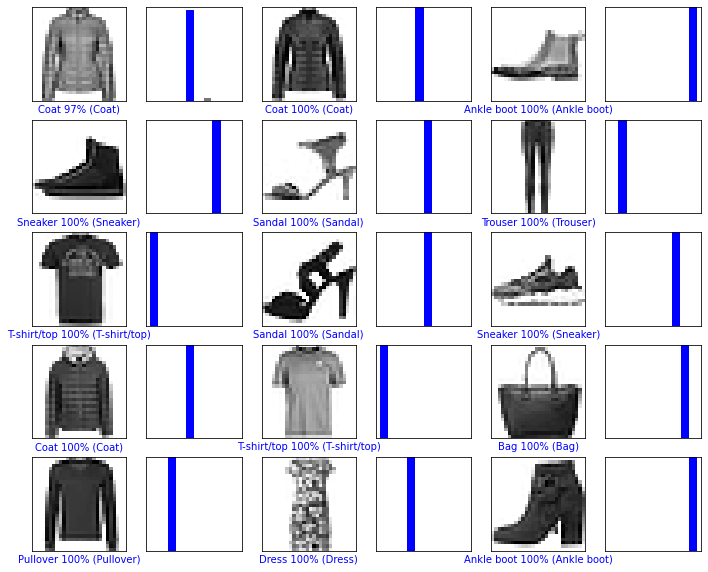

In [79]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [80]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [81]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [82]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.2811327e-07 9.9075933e-08 4.0466239e-04 3.0129190e-09 9.7318745e-01
  1.1532479e-09 2.6403289e-02 5.1368892e-10 3.3629721e-11 4.2543775e-06]]


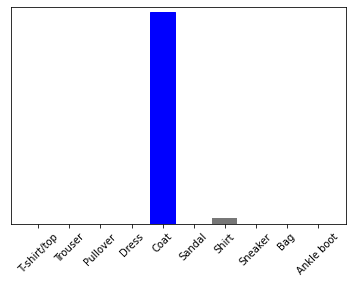

In [83]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [84]:
np.argmax(predictions_single[0])

4